
#    Deep Learning Course 2019
######  Lecturer: Assistant prof. Siamak Mehrkanoon
####  =====================================================================================================

## Assignment-1:

### Download the Iris data and explore it, (visualize it, how many classes, instances, features, etc)
### Select feature number 0 and 2 and the first 100 samples and do the following analysis: 

### 1) Implement the logistic regression model that discussed in the class (with and without regularization). Use Gradient descent algorithm for updating the parameters. Plot the results.

### 2) Explore the influence of learning rate on the convergence of the model. Tune the learning rate.

### 3) Repeat steps 1-4 for different randomly selected features (e.g. 1 and 3 or 2 and 3) and compare the results.

### 4) Give the option to the users to select whatever combination of features they want and your code will do the rest.

### 5)  Try your model on Monk2 dataset and report the results, (test accuracy, training accuracy, optimal learning rate, loss value). Use the last 20% of the data as test.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()
df = df[:100]
classes = df[4].unique()

# Normalize the date
samples = df.copy()
samples[4][samples[4] == classes[0]] = 0
samples[4][samples[4] == classes[1]] = 1
samples = preprocessing.MinMaxScaler().fit_transform(samples)
#samples = preprocessing.scale(samples)
#forwardPass(df[0])
#print(samples)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Looking at the dataset and having a look at how many classes and min max of each features. Have a look whether there are missing values. If so, how do I fill them up? How many samples do we have?

In [3]:
print(f'Number of samples: {len(df)}')
print(f'Classes: {classes}')
print(f'First Feature  min: {np.min(df[0])} max: {np.max(df[0])} mean: {np.mean(df[0]):.2f} median: {np.median(df[0])} Std: {np.std(df[0]):.2f}')
print(f'Second Feature min: {np.min(df[1])} max: {np.max(df[1])} mean: {np.mean(df[1]):.2f} median: {np.median(df[1])} Std: {np.std(df[1]):.2f}')
print(f'Third Feature  min: {np.min(df[2])} max: {np.max(df[2])} mean: {np.mean(df[2]):.2f} median: {np.median(df[2])} Std: {np.std(df[2]):.2f}')
print(f'Fourth Feature min: {np.min(df[3])} max: {np.max(df[3])} mean: {np.mean(df[3]):.2f} median: {np.median(df[3])} Std: {np.std(df[3]):.2f}')
# check for missing values
print(f'Missing Entries: {np.sum(pd.isna(df))}')

Number of samples: 100
Classes: ['Iris-setosa' 'Iris-versicolor']
First Feature  min: 4.3 max: 7.0 mean: 5.47 median: 5.4 Std: 0.64
Second Feature min: 2.0 max: 4.4 mean: 3.09 median: 3.05 Std: 0.47
Third Feature  min: 1.0 max: 5.1 mean: 2.86 median: 2.45 Std: 1.44
Fourth Feature min: 0.1 max: 1.8 mean: 0.78 median: 0.8 Std: 0.56
Missing Entries: 0    0
1    0
2    0
3    0
4    0
dtype: int64


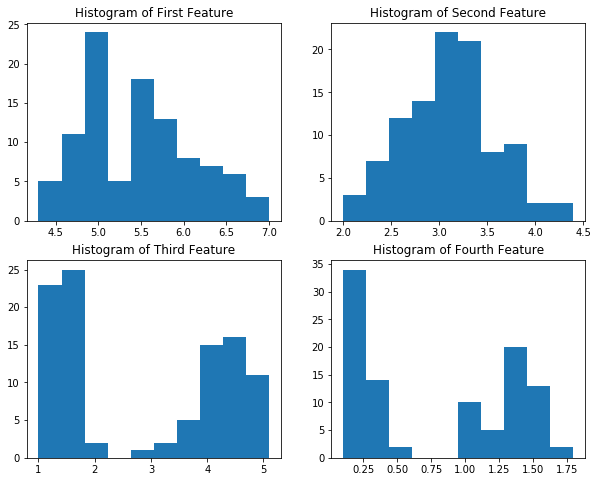

In [4]:
fig = plt.figure(figsize=(10,8))

plt.subplot(221)
plt.hist(df[0])
plt.title('Histogram of First Feature')
plt.subplot(222)
plt.hist(df[1])
plt.title('Histogram of Second Feature')
plt.subplot(223)
plt.hist(df[2])
plt.title('Histogram of Third Feature')
plt.subplot(224)
plt.hist(df[3])
plt.title('Histogram of Fourth Feature')
plt.show()

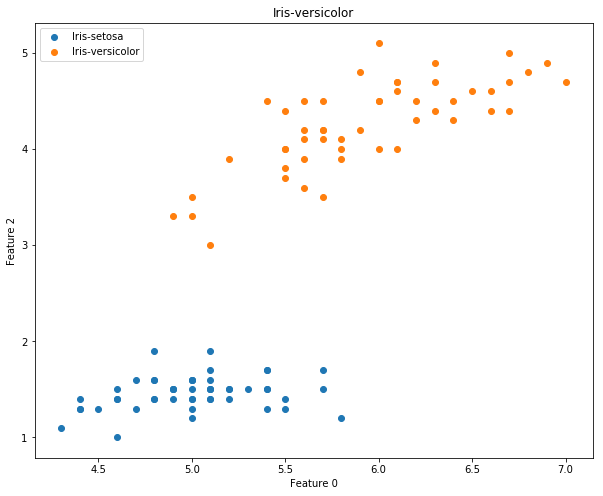

In [5]:
plt.figure(figsize=(10,8))
for i, c in enumerate(classes):
    #plt.subplot(1,3,i+1)
    plt.title(c)
    plt.scatter(df[df[4] == c][0], df[df[4] == c][2], label=c)
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 2')
    plt.legend()

plt.show()

The neural network consists of 2 input neurons (since we have 2 features as input) and one neuron in the output layer.

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def derivedSigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [148]:
class NN:
    #weights2 = np.random.uniform(-4*np.sqrt(6.0/3), 4*np.sqrt(6.0/3), size=(2, 1))
    
    
    def __init__(self, learning_rate, epochs, regularization, regularizationTerm=None):
        self.learning_rate = learning_rate
        self.regularization = regularization
        if regularization:
            self.lamReg = regularizationTerm
        self.maxEpochs = epochs
        self.errors = []
        # weight initialization is in range -4*sqrt(6/numNeuronsInLayer) and +4*sqrt(6/numNeuronsInLayer)
        self.weights = np.random.uniform(-4*np.sqrt(6.0/3), 4*np.sqrt(6.0/3), size=(3, 1))

    def forwardPass(self, x):
        if len(x.shape) == 1:
            x = x.reshape(-1, 1).T
        
        # adding bias
        self.inp = np.hstack((np.ones((len(x), 1)), x))
        self.z = np.dot(self.inp, self.weights)
        self.prediction = sigmoid(self.z)
        return self.prediction
    
    
    def train(self,data):
        samples = data[:, :2]
        targets = data[:, 2]
        
        epochs = 0
        converged = False        
        while not converged:
            epochs += 1
            totalError = 0.0
            samples = np.random.permutation(samples)

            regTerm = self.lamReg/2 *np.sum(self.weights**2) if self.regularization else 0
            loss = self.logLossFunction(self.forwardPass(samples).T, np.expand_dims(targets, axis=0), False)
            
            gradient0 = loss * samples[:, 0]
            gradient1 = loss * samples[:, 1]

            self.weights[1] -= self.learning_rate * -np.mean(gradient0) + regTerm
            self.weights[2] -= self.learning_rate * -np.mean(gradient1) + regTerm
            
            totalError = np.sum(np.abs(loss))
            self.errors.append(totalError)
            if epochs%100 == 0:
                print(f'Error in epoch {epochs}: {totalError}')
            if self.maxEpochs != 0:
                if epochs >= self.maxEpochs:
                    break
            if np.abs(totalError) < 0.005:
                converged = True
        print(f'Converged after {epochs} epochs.')
        
    def lossFunction(self, pred, target, derived=False):
        if not derived:
            return -0.5*(target-pred)**2
        else:
            return -(target-pred)
        
    
    def logLossFunction(self, pred, target, derived=False):
        if not derived:
            # this is to avoid NaNs
            pred[pred == 0.0] += 0.0001
            pred[pred == 1.0] -= 0.0001
            return -target*np.log(pred)-(1-target)*np.log(1-pred)
        else:
            return -(target-pred)


In [149]:
def trainNN(samples, featuresToDelete, learning_rate, epochs, regularization, regularizationTerm=None):
    # Putting these in vector shapes
    nn = NN(learning_rate, epochs, regularization, regularizationTerm)
    print(f'Weights at the start: {nn.weights}')
    # only use features 0 and 2
    data = np.delete(samples, featuresToDelete, axis=1)
    data = np.random.permutation(data)
    data_train = data[:int(0.8*len(data))]
    # print(data_train)
    data_test = data[int(0.8*len(data)):]
    nn.train(data_train)

    # print(data_test)
    # test
    test_error = np.mean(np.abs(data_test[:, 2] - nn.forwardPass(data_test[:, :2]))**2)

#     test_error = test_error/len(data_test)
    print(f'Test Error: {test_error}')

    n=10
    print(f'Target: {data_test[:, 2]} prediction: {nn.forwardPass(data_test[:, :2])}')
    print(f'Weights: {nn.weights}')
    return nn

### Regularization on

In [152]:
nn = trainNN(samples, [1, 3], learning_rate = 0.01, epochs=1000, regularization=True, regularizationTerm=0.001)

Weights at the start: [[-0.02516814]
 [ 4.12304795]
 [ 4.82941295]]
Error in epoch 100: 141.22246411836096
Error in epoch 200: 151.15359473511583
Error in epoch 300: 134.138535547103
Error in epoch 400: 121.76820875699606
Error in epoch 500: 124.55596195602983
Error in epoch 600: 120.21671377480132
Error in epoch 700: 115.77213157930939
Error in epoch 800: 117.13656218916329
Error in epoch 900: 119.77439239773584
Error in epoch 1000: 124.6047876558472
Converged after 1000 epochs.
Test Error: 0.3869046682096278
Target: [1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.] prediction: [[0.98699951]
 [0.97933316]
 [0.74615617]
 [0.75313034]
 [0.7524628 ]
 [0.99405262]
 [0.97191721]
 [0.9403941 ]
 [0.68868441]
 [0.75800605]
 [0.63174826]
 [0.7213343 ]
 [0.97590186]
 [0.99187468]
 [0.62474465]
 [0.97940563]
 [0.96207468]
 [0.73392971]
 [0.98051279]
 [0.70139548]]
Weights: [[-0.02516814]
 [ 1.71619948]
 [ 3.83558608]]


### Regularization off

In [155]:
nn2 = trainNN(samples, [1, 3], learning_rate = 0.01, epochs=1000, regularization=False)


Weights at the start: [[-0.32420579]
 [ 4.78994115]
 [ 4.50592168]]
Error in epoch 100: 206.71269016130827
Error in epoch 200: 286.49640278234705
Error in epoch 300: 378.42127024235094
Error in epoch 400: 572.4500691027936
Error in epoch 500: 662.705149202455
Error in epoch 600: 617.2243843634598
Error in epoch 700: 563.6753511867806
Error in epoch 800: 509.8340450156326
Error in epoch 900: 506.8190927739768
Error in epoch 1000: 508.50586756108396
Converged after 1000 epochs.
Test Error: 0.2956484523696725
Target: [0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.] prediction: [[0.99999979]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.99999999]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.9994665 ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.64264637]
 [0.99999926]]
Weights: [[-0.32420579]
 [34.60386393]
 [37.35405625]]


[[-0.02516814]
 [ 1.71619948]
 [ 3.83558608]]
[[-0.32420579]
 [34.60386393]
 [37.35405625]]


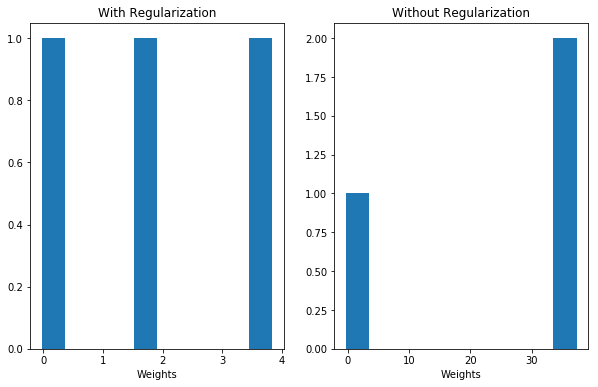

In [157]:
# look at weights --> are they huge?
# what if regularization is used?
print(nn.weights)
print(nn2.weights)
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.title("With Regularization")
plt.xlabel('Weights')
plt.hist(nn.weights)
plt.subplot(122)
plt.title("Without Regularization")
plt.xlabel('Weights')
plt.hist(nn2.weights)
plt.show()

## 4) To train the NN with other features one has to give the function trainNN the parameter features to delete. In the previous calls the features 1 and 3 were deleted. If we want to train on features 1 and 3 we have to delete features 0 and 2:

In [159]:
nn2 = trainNN(samples, [0, 2], learning_rate = 0.01, epochs=1000, regularization=False)

Weights at the start: [[-1.68911753]
 [-2.19973274]
 [-1.39112586]]
Error in epoch 100: 113.95063332926934
Error in epoch 200: 98.37054058432625
Error in epoch 300: 85.24587857481141
Error in epoch 400: 74.71567703545831
Error in epoch 500: 71.00896010005174
Error in epoch 600: 62.78398798296471
Error in epoch 700: 57.217525665030834
Error in epoch 800: 62.28050375925785
Error in epoch 900: 59.70832641644256
Error in epoch 1000: 61.62387796509087
Converged after 1000 epochs.
Test Error: 0.2855411906597937
Target: [1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0.] prediction: [[0.74503158]
 [0.52416941]
 [0.42402567]
 [0.72666748]
 [0.40112589]
 [0.34309306]
 [0.63859887]
 [0.40112589]
 [0.48562783]
 [0.44725643]
 [0.80464118]
 [0.65351102]
 [0.51929757]
 [0.63986028]
 [0.51793202]
 [0.83265648]
 [0.60956745]
 [0.59393919]
 [0.47071976]
 [0.50924956]]
Weights: [[-1.68911753]
 [ 2.26816775]
 [ 2.62237884]]


In [158]:
lrates = [0.0001, 0.001, 0.01, 0.1, 1]
for lr in lrates:
    print(f'Learning rate: {lr}')
    trainNN(samples, [1, 3], learning_rate = lr, epochs=1000, regularization=True, regularizationTerm=0.001)


Learning rate: 0.0001
Weights at the start: [[1.56406201]
 [4.84867028]
 [3.28143826]]
Error in epoch 100: 168.79986519234302
Error in epoch 200: 131.77943546558654
Error in epoch 300: 122.14177630251059
Error in epoch 400: 107.77245724278156
Error in epoch 500: 96.90092260648377
Error in epoch 600: 89.39771519886612
Error in epoch 700: 84.77589174944833
Error in epoch 800: 79.09729078984098
Error in epoch 900: 74.71319343160762
Error in epoch 1000: 72.90219309363266
Converged after 1000 epochs.
Test Error: 0.4136348416919921
Target: [0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0.] prediction: [[0.85792601]
 [0.8261736 ]
 [0.83575545]
 [0.78516487]
 [0.80626952]
 [0.8247611 ]
 [0.85872083]
 [0.77206935]
 [0.84940451]
 [0.83665069]
 [0.84248363]
 [0.74655102]
 [0.76801855]
 [0.77436161]
 [0.82381443]
 [0.77847578]
 [0.79022126]
 [0.85486103]
 [0.84291683]
 [0.83184904]]
Weights: [[ 1.56406201]
 [ 0.67291097]
 [-0.88783684]]
Learning rate: 0.001
Weights at the start: [[ 3.20

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: overflow encountered in square


Error in epoch 800: nan
Error in epoch 900: nan
Error in epoch 1000: nan
Converged after 1000 epochs.
Test Error: nan
Target: [0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1.] prediction: [[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]
Weights: [[3.20134953]
 [       nan]
 [       nan]]
Learning rate: 0.01
Weights at the start: [[-5.45682592]
 [ 1.66358652]
 [ 3.6657747 ]]
Error in epoch 100: 176.9675720355961
Error in epoch 200: 203.89528947507665
Error in epoch 300: 221.9969798524418
Error in epoch 400: 232.4581515897653
Error in epoch 500: 244.36713836101336
Error in epoch 600: 255.18321962573089
Error in epoch 700: 260.2047746843584
Error in epoch 800: 272.45221193620307
Error in epoch 900: 273.388952273258
Error in epoch 1000: 284.05270009056693
Converged after 1000 epochs.
Test Error: 0.3988615960133589
Target: [1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0.] pred

### Since our implementation is still faulty we can not conclude anything from different learning rates.

## Part 2

In [160]:
import scipy.io as sio
monk2 = sio.loadmat('monk2.mat')['monk2']
print(monk2)

[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 2 1]
 [1 1 1 ... 2 2 1]
 ...
 [3 2 2 ... 4 1 0]
 [3 2 2 ... 4 1 0]
 [3 3 1 ... 4 2 0]]
